## Confidence Intervals

In this notebook we will review the concept of confidence intervals, how we calculate them in the presence and absence of an assumed model.

Suppose our observations follow a normal distribution $X_i \sim \mathcal{N}(\mu, \sigma)$. 

If the parameter of interst is $\mu$, the $q$'th percentile confidence interval for this parameter is a **random** interval for which q% of the time the true value of the parameter falls within that interval.

The confidence interval can be written as 

$[\bar{X} - z S/\sqrt{N}, \bar{X} + z S/\sqrt{N}]$, 

where $z$ is the q + (1 - q)/2 percentile for the standard normal distribution.

Let's simulate observations from this distribution where $\mu=5$ and $\sigma = 2$. We will use the random number simulation functions from `numpy`.

In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [2]:
mu = 5
sigma = 2
N = 100
q = 0.95

x = np.random.normal(mu, sigma, N)

In [3]:
z = sp.stats.norm.ppf(q+(1 - q)/2, loc=0, scale=1)

CI_upper = np.mean(x) +  z * np.std(x) / np.sqrt(N)
CI_lower = np.mean(x) -  z * np.std(x) / np.sqrt(N)

In [4]:
def CI(q, mu, sigma, N, ):

    x = np.random.normal(mu, sigma, N)

    z = sp.stats.norm.ppf(q+(1 - q)/2, loc=0, scale=1)

    CI_upper = np.mean(x) +  z * np.std(x) / math.sqrt(N)
    CI_lower = np.mean(x) -  z * np.std(x) / math.sqrt(N)

    return(CI_lower, CI_upper)

In [5]:
CIs = [CI(0.95, mu, sigma, N) for i in np.arange(N)]

/tmp/ipykernel_1717/3081817933.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r|-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((bounds[0],bounds[1]),(i,i),'r|-',color='b')


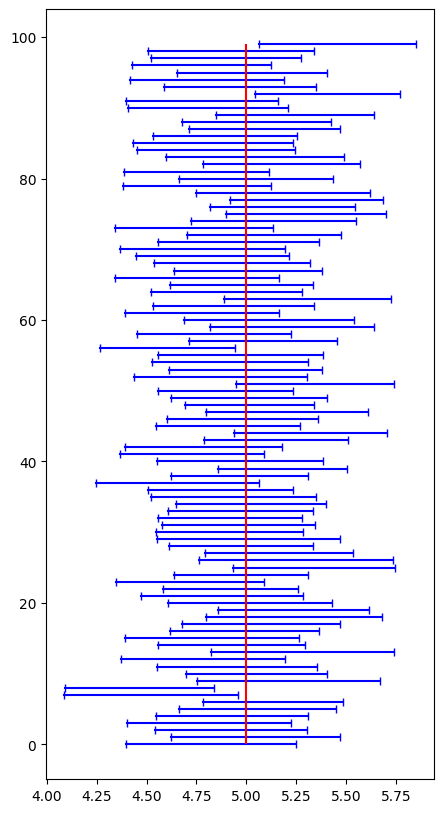

In [6]:
plt.figure(figsize = (5,10))
for i, bounds in enumerate(CIs):
    plt.plot((bounds[0],bounds[1]),(i,i),'r|-',color='b')
plt.vlines(mu, 0, N-1, color='r')

In [7]:
def plot_CIs(q, N):

    CIs = [CI(q, mu, sigma, int(N)) for i in np.arange(N)]
    
    plt.figure(figsize = (5,10))
    for i, bounds in enumerate(CIs):
        plt.plot((bounds[0],bounds[1]),(i,i),'r|-',color='b')
    plt.vlines(mu, 0, N-1, color='r')


/tmp/ipykernel_1717/1362626876.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r|-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((bounds[0],bounds[1]),(i,i),'r|-',color='b')


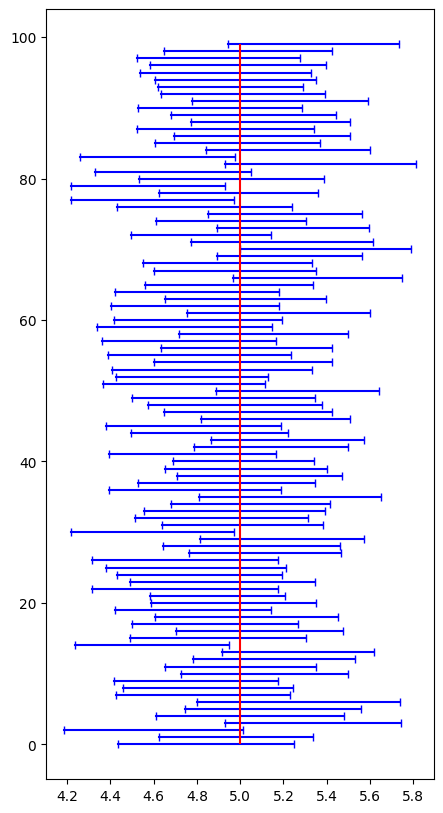

In [8]:
plot_CIs(0.95, 100)

In [9]:
!pip install ipywidgets

In [10]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
N_slider = widgets.FloatLogSlider(value=100, base=10, min=1, max=4, step=1)
q_slider = widgets.FloatSlider(min=0.50, max=1, step=0.0125, value=.95)
interact(plot_CIs, N=N_slider, q=q_slider)

interactive(children=(FloatSlider(value=0.95, description='q', max=1.0, min=0.5, step=0.0125), FloatLogSlider(…

<function __main__.plot_CIs(q, N)>

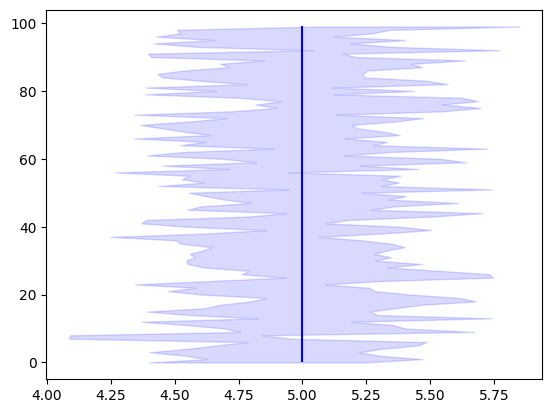

In [12]:
fig, ax = plt.subplots()
# ax.plot(x, df_grouped['mean'])
ax.fill_betweenx(np.arange(N), np.array(CIs)[:,0], np.array(CIs)[:,1], color='b', alpha=.15)
plt.vlines(mu, 0, N-1, color='b')

We can visually inspect that the mean value is not in the interval in 5 out of the 100 intervals. We can also check this numerically.

In [10]:
sum((mu < np.array(CIs)[:,1]) & (mu > np.array(CIs)[:,0]))

np.int64(95)

#### Confidence Intervals vs Error Bars

### Bootstrap Confidence Intervals

In real applications we sometimes do not know the distribution of the random observations of interest. How can we find the confidence intervals in this case

We could approximate those from subsamples of the observations. The procedure is called bootrstrap.

Let's start with a sample of 10000 observations.

In [13]:
x = np.random.normal(mu, sigma, 10000)

In [19]:
import random
x_subsample = random.choices(x, k=1000)

In [22]:
np.quantile(x_subsample, q=0.95)

np.float64(8.265003164040698)